In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [16]:
wine_df = pd.read_csv("winequality-red.csv", delimiter = ";")

In [17]:
inputs = wine_df.drop(['quality'], axis=1)
X = inputs.to_numpy()
t = wine_df['quality'].to_numpy()
N = wine_df.shape[0]
dim = X.shape[1]

In [18]:
# W* = (X * X_T )^-1 * X * t   
wStar = np.linalg.inv(X.transpose() @ X) @ X.transpose() @ t
wStar

array([ 4.19374044e-03, -1.09974310e+00, -1.84145975e-01,  7.07117376e-03,
       -1.91141882e+00,  4.54780885e-03, -3.31855188e-03,  4.52914616e+00,
       -5.22898302e-01,  8.87076125e-01,  2.97022815e-01])

In [32]:
def err(X, w, t):
    return np.linalg.norm(X @ w -t)**2/ N

def lms(X, t, iterCount, wStar):
    W = []
    errr=[]
    randLim = np.random.randint(0, N, size = iterCount)
    initW = np.zeros(dim)
    #initW = np.random.rand(dim)
    for n in randLim: 
        W.append(np.linalg.norm(initW - wStar))
        errr.append(err(X, initW, t))
        initW = initW + (t[n] - initW @ X[n,:]) * X[n,:] / (np.linalg.norm(X[n,:])**2)
    return initW, W, errr

0.4170492248204845
0.5663362351353508


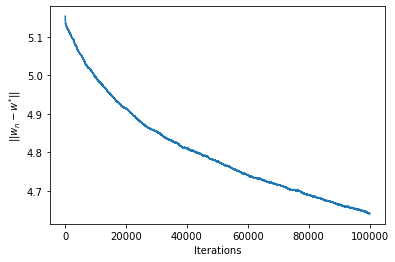

Wall time: 4.96 s


In [33]:
%%time
itercount = 100000
print(err(X, wStar, t))
lmsW, W, errr = lms(X, t, itercount, wStar = wStar)
print(err(X, lmsW, t))
plt.plot(range(itercount), W)
plt.xlabel('Iterations')
plt.ylabel(r'$\||w_{n} - w^{*}\||$')
plt.show()

In [34]:
# W_100000
lmsW

array([ 0.07976335, -1.32647724, -0.02389973, -0.02860516, -0.03746184,
        0.03378625, -0.01567573,  0.393276  ,  0.32423178,  1.22214998,
        0.35385026])

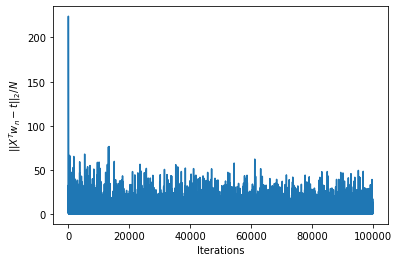

In [35]:
plt.plot(range(itercount), errr)
plt.xlabel('Iterations')
plt.ylabel(r'$\||X^{T}w_{n} - t\||_{2}/N$')
#plt.ylim(0,100)
plt.show()